# Proyecto 6: Sistemas de recomendación

## Dataset

El dataset que vamos a usar en este proyecto es el del proyecto [MovieLens](http://grouplens.org/datasets/movielens/). Estos son relevados por el grupo de investigación GroupLens de la Universidad de Minnesota. Vamos a usar la versión 100K.

Está basado en un sistema de rating de 5 estrellas y texto libre para tags a partir del servicio de recomendaciones MovieLens. Contiene 100.000 ratings para 1.682 películas. Los datos fueron creados por 943 usuarios.

En el [Readme](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt) del dataset se puede encontrar información adicional. A continuación vamos a describir cada uno de ellos.

### Ratings (u.data)

Cada línea representa el rating para una película para un usuario. Los ratings están basados en un sistema de 5 estrellas, con una salto de 0.5 estrellas. Los timestamps están expresados en segundos desde la medianoche de 01/1970 (UTC). El formato es:

`user id | item id | rating | timestamp`

### Usuarios (u.users)

Cada línea del archivo representa un usuario. Se incluye información demográfica. El formato es:

`user id | age | gender | occupation | zip code`

### Películas (u.item)

Cada línea corresponde a una película. Puede haber inconsistencias en los nombres. El formato es:

`movie id | movie title | release date | video release date | IMDb URL | generos`



Las columnas con los generos son binarias indicando la presencia o ausencia de cada uno en la película. Los géneros pueden ser:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* unknown

## Experimentación

Durante todo este proyecto vamos a utilizar la librería `surprise` para llevar a cabo las experimentaciones.

Como se mencionó en clase, las implementaciones en esta librería tiene algunas mejoras respecto de las estrategias convencionales como SVD. Esto se traduce en una mayor cantidad de parámetros para optimizar.

Vamos a levantar los datos. En primer lugar, definamos el formato para poder leer los datos.

**1) Utilizar** el `Reader` con el parámetro `line_format` igual a `'user item rating timestamp'` y `sep` como `'\t'`. Guardarlo en una variable `reader`.

In [2]:
from surprise import Dataset
from surprise import Reader
import numpy as np
import pandas as pd

Utilizando este `reader` cargar los datos:

In [5]:
reader = Reader(name=None, line_format='user item rating timestamp', sep='\t', rating_scale=(1, 5), skip_lines=0)

In [6]:
data = Dataset.load_from_file('/Users/iscoalderete/Downloads/entrega+6/dataset/ml-100k/u.data', reader=reader)

__2) Ejecutar una corrida inicial usando cross validation y el algoritmo SVD (5 folds). Imprimir los RMSE de testing.__

In [7]:
from surprise.model_selection import cross_validate
from surprise import SVD

svd = SVD(n_factors=100, n_epochs=20, random_state=42)
cv_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9321  0.9338  0.9395  0.9376  0.9399  0.9366  0.0031  
MAE (testset)     0.7307  0.7364  0.7405  0.7411  0.7411  0.7380  0.0040  
Fit time          4.66    4.77    4.69    4.86    4.67    4.73    0.08    
Test time         0.12    0.18    0.19    0.14    0.14    0.15    0.03    


__3) Evaluar el RMSE (promedio de cross validation) de testing de acuerdo a la cantidad de factores en SVD.__

In [47]:
# Cantidad de factores
n_factors = [0,100,200,300,400,500,600,700]

# Calculo de cambio de RMSE de acuerdo a n_factors
svd_rmse = []

for i, factor in enumerate(n_factors):
    svd = SVD(n_factors=factor, n_epochs=100, random_state=42)
    cv_results = cross_validate(svd, data, measures=['RMSE','MSE'], cv=5, verbose=True)
    svd_rmse.append(cv_results['test_rmse'].mean())
    print('Ejecucion', (i+1), 'con factor', factor)

Evaluating RMSE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9407  0.9423  0.9404  0.9422  0.9403  0.9412  0.0009  
MSE (testset)     0.8850  0.8880  0.8844  0.8878  0.8841  0.8858  0.0017  
Fit time          4.68    4.05    4.07    4.05    4.07    4.18    0.25    
Test time         0.11    0.12    0.11    0.11    0.11    0.11    0.00    
Ejecucion 1 con factor 0
Evaluating RMSE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9913  0.9820  0.9779  0.9745  0.9766  0.9805  0.0059  
MSE (testset)     0.9826  0.9643  0.9562  0.9497  0.9538  0.9613  0.0116  
Fit time          22.74   23.14   23.50   23.30   23.49   23.23   0.28    
Test time         0.12    0.12    0.12    0.12    0.12    0.12    0.00    
Ejecucion 2 con factor 100
Evaluating RMSE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fo

__4) Graficar los promedios RMSE del conjunto de testing de acuerdo a la cantidad de factores en SVD.__

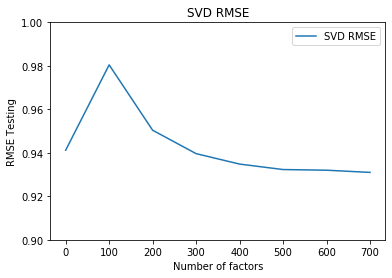

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(0,800,100), svd_rmse, label='SVD RMSE')
plt.ylim((0.9,1))
plt.legend(loc='best')
plt.title('SVD RMSE')
plt.xlabel('Number of factors')
plt.ylabel('RMSE Testing')
plt.show()

__5) Usando GridSearch, encontrar el mejor estimador usando SVD con 500 factores. Imprimir el mejor rmse. Utilizar `refit` para obtener obtener el mejor estimador ya ajustado como resultado.__

Utilizar el espacio de parámetros:
* n_epochs: [5, 10]
* lr_all: [0.002, 0.005]
* reg_all: [0.4, 0.6]


In [8]:
from surprise.model_selection import GridSearchCV

params = {'n_factors': [500],
          'n_epochs': [5, 10],
          'lr_all': [0.002, 0.005],
          'reg_all': [0.4, 0.6]}


grid_search = GridSearchCV(SVD, params, cv=3, refit=True)
grid_search.fit(data)

In [9]:
print(grid_search.best_params['rmse'])

{'n_factors': 500, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [10]:
print(grid_search.best_score['rmse'])

0.9648410619413411


In [11]:
algo = grid_search.best_estimator['rmse']
algo

__6) Obtener una predicción para el usuario 321 para la película Titanic.__

In [12]:
algo.fit(data.build_full_trainset())

In [13]:
uid = str(321) 
iid = str(313) 

pred = algo.predict(uid, iid, verbose=True)

user: 321        item: 313        r_ui = None   est = 3.98   {'was_impossible': False}


__7) Desarrollar una función que dado un usuario, obtenga la mejor predicción disponible (de acuerdo a nuestros datos de películas).__

In [14]:
# Primero entrenamos un algoritmo SVD en el dataset de movielens
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Luego, predecimos ratings para todos los pares (u, i) que no estan en el trainning set
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

In [19]:
from collections import defaultdict

def get_top_n(predictions, n, u):
    
    user = str(u)
    
    # Primero mappeamos las predicciones a cada usuario
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if str(uid) == user:
            top_n[uid].append((iid, est))
            
    # Luego sorteamos las predicciones para cada usuario y nos quedamos con las k mas altas
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    # Printeamos el numero de usuario y su    
    for uid, user_ratings in top_n.items():
        print(uid, [iid for (iid, _) in user_ratings])

In [20]:
# Ejemplo obteniendo la mejor prediccion para el usuario 400

top_n = get_top_n(predictions, 1, 400)

400 ['169']
